## **Introduction**
We'll take a deep dive into the dataset to gain answers to our posed questions to reveal more insights. The analysis mainly focuses on the ports, what they have in their locations, and their capabilities. This will reveal which continents, countries, and ports stand out.

#### **Posing Questions**
While the dataset contains a wealth of information, I'll limit my analysis to the following areas:
1. How many ports and terminals are in the countries included in the dataset?
2. How many total ports are in the continents included in the dataset?
3. What are the total ports and terminals in each world's water body?
4. How are the ports classified by size (large, medium, and small)?
5. How do their uses classify the ports?
6. How are the ports classified:
    * General supplies readily available.
    * Adequate lifting capacity.
    * Health and safety protocols in place.
    * Essential infrastructure on site.
    * Restrictions on vessel entry.
    * Quality of repair services offered.
    * Waste management systems in place.
    * Support equipment at hand.
    * Essential services provided.
    * Vessel support systems available.

In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

matplotlib.rcParams["font.size"] = 11
matplotlib.rcParams["figure.figsize"] = (9, 5)
plt.style.use("dark_background")
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.axisbelow"] = True
plt.rcParams["grid.linewidth"] = 0.1

In [3]:
# Schema to refer to for the explanation of data fields in the dataset
schema_df = pd.read_csv("schema.csv", index_col= "Field_Name").Description_of_Contents
schema_df

Field_Name
OID                    A common identifier is given for all entries i...
WPI Number             Each port and place contained in this dataset ...
Region Name            Region Names, as given in the 2019 edition of ...
Main Port Name         Main Port Name, with no diacritical marks.  In...
Alternate Port Name    Alternate, conventional, or familiar names may...
                                             ...                        
Repairs                Repairs that can be made to ocean-going vessel...
Dry Dock               The general size and type of the largest under...
Railway                The general size and type of the largest under...
Latitude                                  Latitude of the port is given.
Longitude                                Longitude of the port is given.
Name: Description_of_Contents, Length: 109, dtype: object

In [4]:
schema_df["Channel Depth (m)"]

'The controlling depth of the principal or deepest channel at chart datum is given.  The channel selected should lead up to the anchorage if within the harbor, or to the wharf/pier.  If the channel depth decreases from the anchorage to the wharf/pier and cargo can be worked at the anchorage, then the depth leading to the anchorage is given.'

In [5]:
world_ports_df = pd.read_csv("Major Ports & Terminals Analysis.csv")
world_ports_df

,World Port Index Number,Region Name,Main Port Name,Alternate Port Name,UN/LOCODE,Country Code,World Water Body,IHO S-130 Sea Area,Entrance Width (m),Channel Depth (m),...,Supplies - Fuel Oil,Supplies - Diesel Oil,Supplies - Aviation Fuel,Supplies - Deck,Supplies - Engine,Repairs,Dry Dock,Railway,Continent,Country
0,7950.0,United States E Coast -- 6585,Maurer,,,United States,North Atlantic Ocean,,0.0,11.0,...,Yes,Yes,Unknown,Yes,Yes,Moderate,Unknown,Unknown,NaN,NaN
1,52235.0,Sulawesi -- 51970,Mangkasa Oil Terminal,,,Indonesia,Teluk Bone; Banda Sea; South Pacific Ocean,,0.0,9.4,...,No,No,Unknown,No,No,None,Unknown,Unknown,Asia,Indonesia
2,47620.0,Madagascar -- 47350,Iharana,,,Madagascar,Indian Ocean,,0.0,14.0,...,No,No,Unknown,No,No,Emergency Only,Unknown,Unknown,Africa,Madagascar
3,47360.0,Madagascar -- 47350,Andoany,,,Madagascar,Mozambique Channel; Indian Ocean,,0.0,20.1,...,No,No,Unknown,No,No,Emergency Only,Unknown,Unknown,Africa,Madagascar
4,47020.0,Tanzania -- 46965,Chake Chake,,,Tanzania,Indian Ocean,,0.0,14.0,...,No,No,Unknown,No,No,Unknown,Unknown,Unknown,Africa,Tanzania
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3734,1560.0,Newfoundland E Coast -- 1410,Lewisporte,,CA LWP,Canada,North Atlantic Ocean,,0.0,0.0,...,Yes,Yes,Unknown,Unknown,Unknown,Limited,Small,Unknown,North America,Canada
3735,1150.0,,Deception Bay,,CA DEB,Canada,Hudson Strait; Arctic Ocean,,0.0,0.0,...,Yes,Yes,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,North America,Canada
3736,1260.0,,Nain,,CA NAI,Canada,Labrador Sea; North Atlantic Ocean,,0.0,0.0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,North America,Canada
3737,1540.0,Newfoundland E Coast -- 1410,Botwood,,CA BWD,Canada,North Atlantic Ocean,,0.0,0.0,...,Yes,Yes,Unknown,Unknown,Unknown,Limited,Unknown,Unknown,North America,Canada


In [6]:
# Check the rows and columns of the dataset
world_ports_df.shape

(3739, 92)

In [7]:
# View column data types
world_ports_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3739 entries, 0 to 3738
Data columns (total 92 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   World Port Index Number                 3739 non-null   float64
 1   Region Name                             3739 non-null   object 
 2   Main Port Name                          3739 non-null   object 
 3   Alternate Port Name                     3739 non-null   object 
 4   UN/LOCODE                               3739 non-null   object 
 5   Country Code                            3739 non-null   object 
 6   World Water Body                        3739 non-null   object 
 7   IHO S-130 Sea Area                      3739 non-null   object 
 8   Entrance Width (m)                      3739 non-null   float64
 9   Channel Depth (m)                       3739 non-null   float64
 10  Anchorage Depth (m)                     3739 non-null   floa

In [8]:
schema_df["Country Code"]

"Country name according to U.S. Government's Geopolitical Entities, Names, and Codes (GENC) standard."

In [9]:
# Countries present in the dataset
world_ports_df["Country Code"].unique()

array(['United States', 'Indonesia', 'Madagascar', 'Tanzania', 'Vanuatu',
       'Papua New Guinea', 'Palau', 'Federated States of Micronesia',
       'Turkey', 'Canada', 'Gibraltar', 'Norway', 'Brazil',
       'Saudi Arabia', 'Latvia', 'Denmark', 'Ukraine', 'Iran',
       'Saint Helena, Ascension, and Tristan da Cunha', 'Thailand',
       'Greece', 'United Kingdom', 'Spain', 'Italy', 'Burma',
       'Norfolk Island', 'Malaysia', 'Sudan', 'Philippines', 'Russia',
       'Algeria', 'Senegal', 'Equatorial Guinea', 'Chile', 'India',
       'Antarctica', 'Greenland', 'Nigeria', 'Gabon', 'Australia',
       'New Zealand', 'Kiribati', 'Sweden', 'China', 'South Korea',
       'Japan', 'France', 'Cuba', 'Sint Maarten', 'Egypt',
       'French Polynesia', 'Taiwan', 'Yemen', 'United Arab Emirates',
       'Dominican Republic', 'Cambodia', 'Wake Island', 'Reunion',
       'Poland', 'Honduras', 'Angola',
       'South Georgia and South Sandwich Islands', 'Guinea',
       'Guinea-Bissau', 'Ireland'

All countries in the world have been featured in the dataset.

In [10]:
# Numbers of Countries present in the dataset
world_ports_df["Country Code"].nunique()

196

In [11]:
# Countries with the highest number of ports
ports_in_countries = world_ports_df.groupby("Country Code")["Main Port Name"].size()
ports_in_countries.sort_values(ascending= False).head(20)

Country Code
United States     666
Canada            262
United Kingdom    185
Japan             163
Norway            137
Indonesia         123
Italy             123
Sweden             92
Philippines        70
Denmark            69
China              68
Russia             67
Australia          66
France             65
Greece             64
India              56
Turkey             54
Spain              52
Brazil             45
Chile              39
Name: Main Port Name, dtype: int64

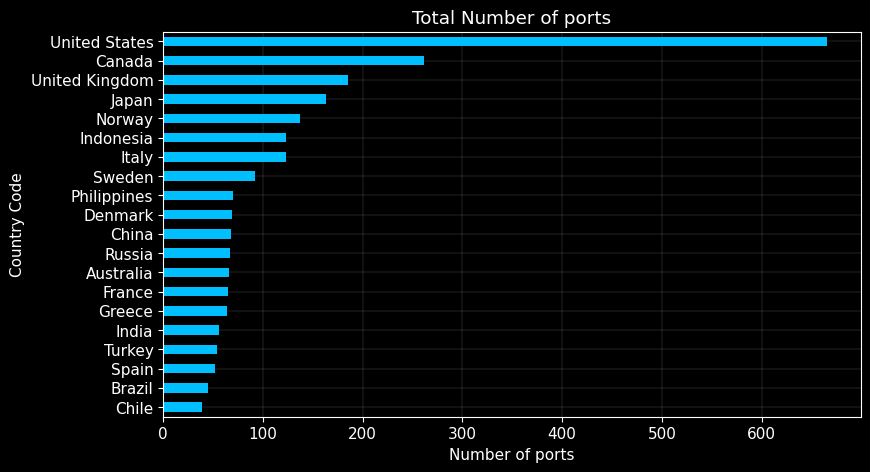

In [12]:
highest_no_ports = ports_in_countries.sort_values(ascending= False).head(20)
highest_no_ports.sort_values(ascending= True).plot.barh(x= "Countries", y= highest_no_ports,
                                title= "Total Number of ports", xlabel= "Number of ports",
                                figsize= (9, 5), color = "deepskyblue");

In [13]:
# Total number of ports in all continents
ports_in_continents = world_ports_df.groupby(["Continent"])["Main Port Name"].count()
ports_in_continents.sort_values(ascending= False)

Continent
Europe           1059
Asia              736
North America     406
Africa            258
South America     207
Oceania           137
Name: Main Port Name, dtype: int64

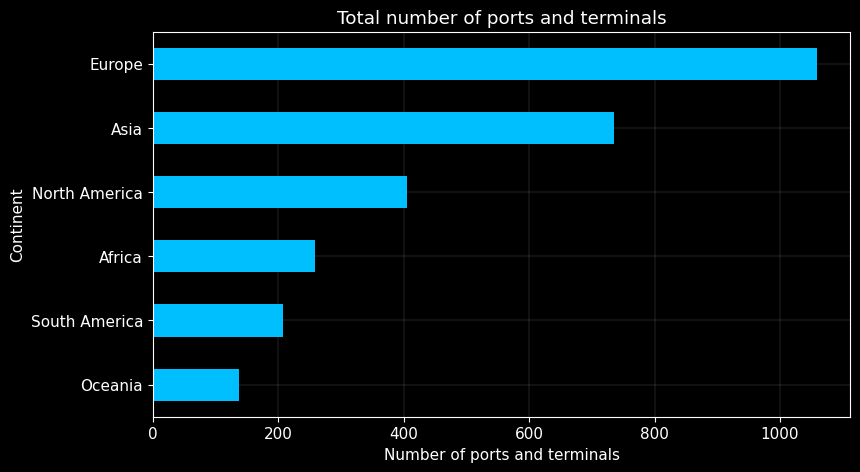

In [14]:
ports_in_continents.sort_values().plot.barh(x= "continent", y= ports_in_continents,
                                title= "Total number of ports and terminals", xlabel= "Number of ports and terminals",
                                figsize= (9, 5), color = "deepskyblue");

In [15]:
# Number of ports in world water bodies
no_ports_water_body = world_ports_df.groupby("World Water Body")["Country Code"].count().sort_values(ascending= False).head(20)
no_ports_water_body

World Water Body
North Atlantic Ocean                                     435
North Pacific Ocean                                      228
Mediterranean Sea; North Atlantic Ocean                  155
Caribbean Sea; North Atlantic Ocean                      154
North Sea; North Atlantic Ocean                          153
Alaska-Canada coastal waters; North Pacific Ocean        131
South Pacific Ocean                                      116
South Atlantic Ocean                                     112
Baltic Sea; North Atlantic Ocean                         109
Sea of Japan; North Pacific Ocean                        104
Norwegian Sea; North Atlantic Ocean                       80
Gulf of Mexico; North Atlantic Ocean                      73
Indian Ocean                                              71
South China Sea; North Pacific Ocean                      62
Persian Gulf; Indian Ocean                                61
Gulf of Bothnia; Baltic Sea; North Atlantic Ocean         61
Lake On

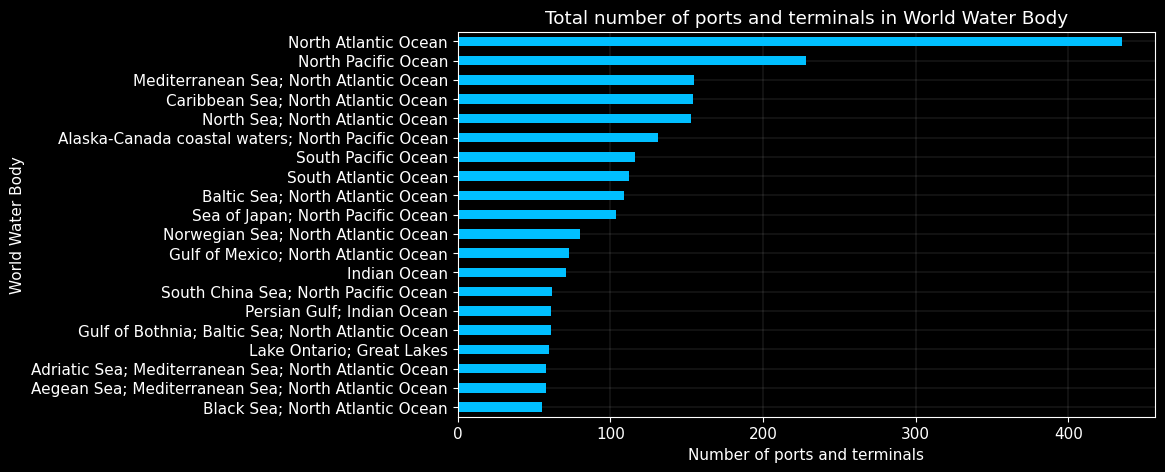

In [16]:
no_ports_water_body.sort_values().plot(x= "World Water Body", y= no_ports_water_body,
                                        title= "Total number of ports and terminals in World Water Body", xlabel= "Number of ports and terminals",
                                        kind= "barh", figsize= (9, 5), color = "deepskyblue");

In [17]:
# Classification of ports by size
large_harbor_size = world_ports_df.loc[(world_ports_df["Harbor Size"] == "Large")]
medium_harbor_size = world_ports_df.loc[(world_ports_df["Harbor Size"] == "Medium")]
small_harbor_size = world_ports_df.loc[(world_ports_df["Harbor Size"] == "Small")]
vsmall_harbor_size = world_ports_df.loc[(world_ports_df["Harbor Size"] == "Very Small")]

In [18]:
size_of_port = [[ "Large", large_harbor_size["Harbor Size"].count()], ["Medium", medium_harbor_size["Harbor Size"].count()],
                ["Small", small_harbor_size["Harbor Size"].count()], ["Very Small", vsmall_harbor_size["Harbor Size"].count()]
]

size_of_ports_df = pd.DataFrame(size_of_port, columns= ["Size", "Sum of Ports"])
size_of_ports_df

,Size,Sum of Ports
0,Large,171
1,Medium,366
2,Small,1025
3,Very Small,2135


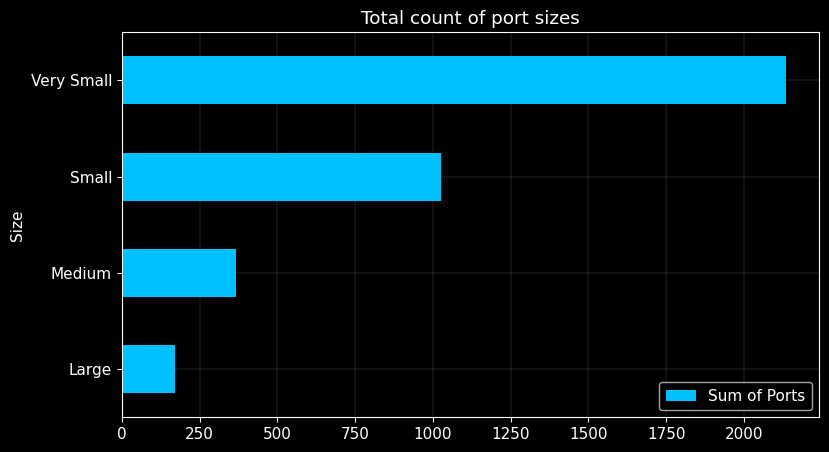

In [19]:
size_of_ports_df.plot(x= "Size", y= "Sum of Ports", 
                        title= "Total count of port sizes" ,kind= "barh", 
                        figsize= (9, 5), color = "deepskyblue");

In [20]:
fishing_harbor = world_ports_df.loc[(world_ports_df["Harbor Use"] == "Fishing")]
military_harbor = world_ports_df.loc[(world_ports_df["Harbor Use"] == "Military")]
cargo_harbor = world_ports_df.loc[(world_ports_df["Harbor Use"] == "Cargo")]
ferry_harbor = world_ports_df.loc[(world_ports_df["Harbor Use"] == "Ferry")]
unknown_use = world_ports_df.loc[(world_ports_df["Harbor Use"] == "Unknown")]

In [21]:
harbor_use = [["Fishing Harbors", fishing_harbor["Harbor Use"].count()], ["Military Harbors", military_harbor["Harbor Use"].count()],
                ["Cargo Harbors", cargo_harbor["Harbor Use"].count()], ["Ferry Harbors", ferry_harbor["Harbor Use"].count()],
                ["Unknown Usage", unknown_use["Harbor Use"].count()]
]

harbor_usage = pd.DataFrame(harbor_use, columns= ["Harbor Use", "Total Harbors"])
harbor_usage

,Harbor Use,Total Harbors
0,Fishing Harbors,7
1,Military Harbors,5
2,Cargo Harbors,102
3,Ferry Harbors,8
4,Unknown Usage,3617


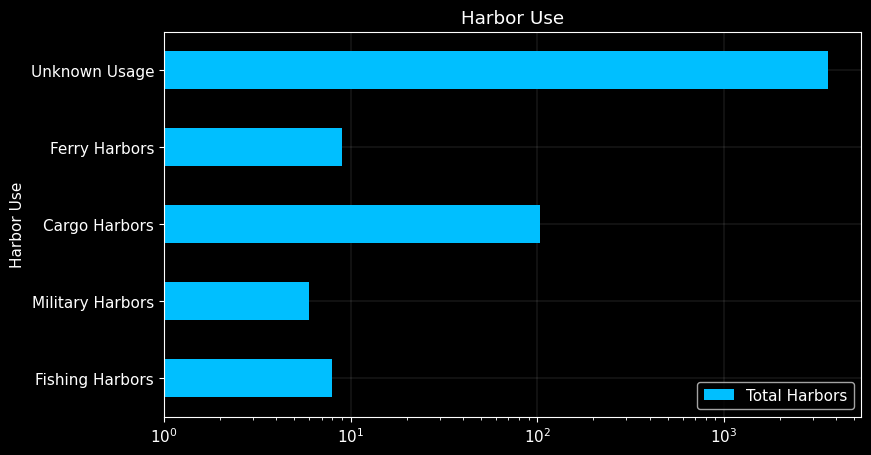

In [22]:
harbor_usage.plot(x= "Harbor Use", y= "Total Harbors", 
                        title= "Harbor Use" ,kind= "barh",
                        figsize= (9, 5), color = "deepskyblue", log= True);

In [23]:
# Ports without entrance restrictions
absence_of_restrictions = world_ports_df.loc[(world_ports_df["Entrance Restriction - Tide"] == "No") & (world_ports_df["Entrance Restriction - Heavy Swell"] == "No")
                    & (world_ports_df["Entrance Restriction - Ice"] == "No") & (world_ports_df["Entrance Restriction - Other"] == "No")
                    & (world_ports_df["Overhead Limits"] == "No")
]
absence_of_restrictions

,World Port Index Number,Region Name,Main Port Name,Alternate Port Name,UN/LOCODE,Country Code,World Water Body,IHO S-130 Sea Area,Entrance Width (m),Channel Depth (m),...,Supplies - Fuel Oil,Supplies - Diesel Oil,Supplies - Aviation Fuel,Supplies - Deck,Supplies - Engine,Repairs,Dry Dock,Railway,Continent,Country
82,14175.0,Chile -- 14070,Caleta Mina Elena,Mina Elena,,Chile,South Pacific Ocean,,0.0,0.0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,South America,Chile
140,11048.0,Dominican Republic -- 10950,Punta Nizao Oil Terminal,,,Dominican Republic,Caribbean Sea; North Atlantic Ocean,,0.0,0.0,...,No,No,Unknown,Unknown,Unknown,None,Unknown,Unknown,North America,Dominican Republic
169,9665.0,Honduras East Coast -- 9630,Puerto Este,East Harbor,,Honduras,Caribbean Sea; North Atlantic Ocean,,0.0,9.4,...,Yes,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,North America,Honduras
253,320.0,Iceland North Coast -- 200,Husavik,,IS HUS,Iceland,Greenland Sea; Arctic Ocean,,0.0,7.9,...,Yes,Yes,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Europe,Iceland
254,2790.0,US St Lawrence R -- 2750,Alexandria Bay,,US AXB,United States,Lake Ontario; Great Lakes,,0.0,3.4,...,Yes,Yes,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN
291,55060.0,New Zealand N Island -- 54990,Auckland,,NZ AKL,New Zealand,South Pacific Ocean,,0.0,9.4,...,Yes,Yes,Unknown,Yes,Yes,Major,Large,Medium,Oceania,New Zealand
601,18210.0,Canada West Coast -- 18080,Squamish,,CA SQA,Canada,Alaska-Canada coastal waters; North Pacific Ocean,,0.0,7.9,...,Yes,Yes,Unknown,Unknown,Unknown,Limited,Unknown,Medium,North America,Canada
666,15480.0,Costa Rica West Coast -- 15470,Golfito,,CR GLF,Costa Rica,North Pacific Ocean,,0.0,7.9,...,Yes,Yes,Unknown,Yes,Yes,Moderate,Unknown,Medium,North America,Costa Rica
677,10500.0,Cuba South Coast -- 10310,Jucaro,,CU JUC,Cuba,Caribbean Sea; North Atlantic Ocean,,0.0,7.9,...,No,No,Unknown,No,No,None,Unknown,Unknown,North America,Cuba
681,14670.0,Chile -- 14070,Mejillones,,CL MJS,Chile,South Pacific Ocean,,0.0,20.1,...,No,No,Unknown,No,Unknown,Limited,Unknown,Unknown,South America,Chile


In [24]:
# vessels support systems
vessel_support = world_ports_df.loc[(world_ports_df["Good Holding Ground"] == "Yes") & (world_ports_df["Turning Area"] == "Yes")
                    & (world_ports_df["Shelter Afforded"] == "Good") & (world_ports_df["Traffic Separation Scheme"] == "Yes") & (world_ports_df["Vessel Traffic Service"] == "Yes")]
vessel_support

,World Port Index Number,Region Name,Main Port Name,Alternate Port Name,UN/LOCODE,Country Code,World Water Body,IHO S-130 Sea Area,Entrance Width (m),Channel Depth (m),...,Supplies - Fuel Oil,Supplies - Diesel Oil,Supplies - Aviation Fuel,Supplies - Deck,Supplies - Engine,Repairs,Dry Dock,Railway,Continent,Country
2717,60610.0,Russia -- 60530,Vladivostok,,RU VVO,Russia,Sea of Japan; North Pacific Ocean,,0.0,18.6,...,Yes,Yes,Unknown,Yes,Yes,Major,Small,Unknown,NaN,NaN
3573,4940.0,US Lake Michigan -- 4570,Green Bay,,US GRB,United States,Lake Michigan; Great Lakes,,91.4,6.4,...,Yes,Yes,Unknown,Yes,Yes,Moderate,Unknown,Unknown,NaN,NaN


In [25]:
# Health measures
health_measures = world_ports_df.loc[(world_ports_df["Quarantine - Pratique"] == "Yes") & (world_ports_df["Quarantine - Sanitation"] == "Yes")
                                        & (world_ports_df["Quarantine - Other"] == "Yes")]
health_measures

,World Port Index Number,Region Name,Main Port Name,Alternate Port Name,UN/LOCODE,Country Code,World Water Body,IHO S-130 Sea Area,Entrance Width (m),Channel Depth (m),...,Supplies - Fuel Oil,Supplies - Diesel Oil,Supplies - Aviation Fuel,Supplies - Deck,Supplies - Engine,Repairs,Dry Dock,Railway,Continent,Country
16,38330.0,Gibraltar -- 38320,Europa Point,,,Gibraltar,Strait of Gibraltar; North Atlantic Ocean,,0.0,12.5,...,Yes,Yes,Unknown,Yes,Yes,Major,Medium,Small,NaN,NaN
43,52350.0,Sulawesi -- 51970,Donggala,,,Indonesia,Makassar Strait; South Pacific Ocean,,0.0,23.2,...,No,No,Unknown,Unknown,Unknown,Emergency Only,Unknown,Unknown,Asia,Indonesia
131,57900.0,Taiwan -- 57880,Su-Ao,Su Ao Kang,,Taiwan,East China Sea; North Pacific Ocean,,0.0,14.0,...,Yes,Yes,Unknown,Unknown,Unknown,Limited,Small,Medium,NaN,NaN
132,60870.0,Sakhalin -- 60840,Vitaz Marine Terminal,,,Russia,Sea of Okhotsk; North Pacific Ocean,,0.0,0.0,...,No,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN
198,42205.0,Greece East Coast -- 42010,Pakhi Oil Terminal,,,Greece,Aegean Sea; Mediterranean Sea; North Atlantic ...,,0.0,23.2,...,Yes,Yes,Unknown,Unknown,Unknown,None,Unknown,Unknown,Europe,Greece
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3601,45010.0,Syria -- 45000,Al Ladhiqiyah,Latakia,SY ALD,Syria,Mediterranean Sea; North Atlantic Ocean,,0.0,14.0,...,Yes,Yes,Unknown,Yes,Yes,Limited,Large,Medium,Asia,Syria
3607,62800.0,Russia -- 62530,Arkhangels'k,Archangel,RU ARH,Russia,White Sea; Barents Sea; Arctic Ocean,,0.0,7.9,...,Yes,Yes,Unknown,Yes,Yes,Major,Large,Large,NaN,NaN
3608,62730.0,Russia -- 62530,Igarka,,RU IAA,Russia,Kara Sea; Arctic Ocean,,0.0,17.1,...,Yes,Yes,Unknown,No,No,Limited,Unknown,Unknown,NaN,NaN
3690,23090.0,Norway -- 20620,Trondheim,,NO TRD,Norway,Norwegian Sea; North Atlantic Ocean,,0.0,6.4,...,Yes,Yes,Unknown,Unknown,Unknown,Limited,Large,Large,Europe,Norway


In [26]:
# Critical infrastructure avaiilable 
critical_infrastructure = world_ports_df.loc[(world_ports_df["Tugs - Salvage"] == "Yes") & (world_ports_df["Tugs - Assistance"] == "Yes")
                                            & (world_ports_df["Communications - Telephone"] == "Yes") & (world_ports_df["Communications - Radio"] == "Yes")
                                            & (world_ports_df["Communications - Radiotelephone"] == "Yes") & (world_ports_df["Communications - Airport"] == "Yes")
                                            & (world_ports_df["Communications - Rail"] == "Yes")]
critical_infrastructure

,World Port Index Number,Region Name,Main Port Name,Alternate Port Name,UN/LOCODE,Country Code,World Water Body,IHO S-130 Sea Area,Entrance Width (m),Channel Depth (m),...,Supplies - Fuel Oil,Supplies - Diesel Oil,Supplies - Aviation Fuel,Supplies - Deck,Supplies - Engine,Repairs,Dry Dock,Railway,Continent,Country
149,8890.0,US Gulf Coast -- 8650,Tri-City Port,,,United States,Lake Michigan; Great Lakes,,0.0,3.4,...,Yes,Yes,Unknown,Yes,Yes,Moderate,Large,Medium,NaN,NaN
244,9240.0,US Gulf Coast -- 8650,Houston,,US HOU,United States,Gulf of Mexico; North Atlantic Ocean,,0.0,14.0,...,Yes,Yes,Unknown,Yes,Yes,Major,Medium,Medium,NaN,NaN
290,55210.0,New Zealand N Island -- 54990,New Plymouth,,NZ NPL,New Zealand,Tasman Sea; South Pacific Ocean,,0.0,9.4,...,Yes,Yes,Unknown,Yes,Yes,Major,Small,Small,Oceania,New Zealand
299,47100.0,Kenya -- 47090,Mombasa,Mvita,KE MBA,Kenya,Indian Ocean,,0.0,14.0,...,Yes,Yes,Unknown,Yes,Yes,Moderate,Large,Large,Africa,Kenya
301,45820.0,Senegal -- 45817,Dakar,,SN DKR,Senegal,North Atlantic Ocean,,0.0,11.0,...,Yes,Yes,Unknown,Yes,Yes,Moderate,Medium,Large,Africa,Senegal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3345,53650.0,Australia -- 53290,Sydney,,AU SYD,Australia,Tasman Sea; South Pacific Ocean,,0.0,12.5,...,Yes,Yes,Unknown,Yes,Yes,Major,Large,Large,Oceania,Australia
3424,48760.0,India West Coast -- 48610,Bhavnagar,,IN BHU,India,Arabian Sea; Indian Ocean,,21.0,3.4,...,Yes,Yes,Unknown,Unknown,Yes,Limited,Small,Small,Asia,India
3598,4930.0,US Lake Michigan -- 4570,Sturgeon Bay,,US SUE,United States,Lake Michigan; Great Lakes,,0.0,4.9,...,Yes,Yes,Unknown,Yes,Yes,Major,Small,Small,NaN,NaN
3611,24210.0,Sweden -- 23860,Malmo,,SE MMA,Sweden,Baltic Sea; North Atlantic Ocean,,0.0,7.9,...,Yes,Yes,Unknown,Yes,Yes,Major,Small,Large,Europe,Sweden


In [27]:
# Available facilities
available_facilities = world_ports_df.loc[(world_ports_df["Facilities - Wharves"] == "Yes") & (world_ports_df["Facilities - Anchorage"] == "Yes")
                                            & (world_ports_df["Facilities - Med Mooring"] == "Yes") & (world_ports_df["Facilities - Ro-Ro"] == "Yes")
                                            & (world_ports_df["Facilities - Solid Bulk"] == "Yes") & (world_ports_df["Facilities - Liquid Bulk"] == "Yes")
                                            & (world_ports_df["Facilities - Container"] == "Yes") & (world_ports_df["Facilities - Breakbulk"] == "Yes")
                                            & (world_ports_df["Facilities - Other"] == "Yes") & (world_ports_df["Medical Facilities"] == "Yes")
                                            ]
available_facilities

,World Port Index Number,Region Name,Main Port Name,Alternate Port Name,UN/LOCODE,Country Code,World Water Body,IHO S-130 Sea Area,Entrance Width (m),Channel Depth (m),...,Supplies - Fuel Oil,Supplies - Diesel Oil,Supplies - Aviation Fuel,Supplies - Deck,Supplies - Engine,Repairs,Dry Dock,Railway,Continent,Country
2721,48495.0,Iran -- 48410,Bandar-E Shahid Reajie,,IR BSR,Iran,Strait of Hormuz; Indian Ocean,,0.0,12.5,...,Yes,Yes,Unknown,Yes,Unknown,Limited,Unknown,Small,Asia,Iran
3471,9370.0,Mexico East Coast -- 9350,Tuxpan,,MX TUX,Mexico,Gulf of Mexico; North Atlantic Ocean,,0.0,3.4,...,Yes,Unknown,Unknown,Unknown,Unknown,Limited,Small,Unknown,North America,Mexico


In [28]:
# Ability to handle oil, petroleum, petrochemical products, and liquefied natural gas
terminal_presence = world_ports_df.loc[(world_ports_df["Facilities - Oil Terminal"]  == "Yes") & (world_ports_df["Facilities - LNG Terminal"] == "Yes")]
terminal_presence

,World Port Index Number,Region Name,Main Port Name,Alternate Port Name,UN/LOCODE,Country Code,World Water Body,IHO S-130 Sea Area,Entrance Width (m),Channel Depth (m),...,Supplies - Fuel Oil,Supplies - Diesel Oil,Supplies - Aviation Fuel,Supplies - Deck,Supplies - Engine,Repairs,Dry Dock,Railway,Continent,Country
2462,48235.0,Oman -- 48225,Duqm,Al Duqm,OM DQM,Oman,Arabian Sea; Indian Ocean,,700.0,19.0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Major,Large,Unknown,Asia,Oman
2531,48605.0,Pakistan -- 48580,Muhamamad Bin Qasim,Port Qasim,PK BQM,Pakistan,Arabian Sea; Indian Ocean,,196.0,14.0,...,Yes,Yes,Unknown,No,No,Limited,Unknown,Unknown,Asia,Pakistan
2533,48617.0,India West Coast -- 48610,Mundra,,IN MUN,India,Arabian Sea; Indian Ocean,,460.0,14.0,...,Yes,Yes,Unknown,Unknown,Unknown,Limited,Unknown,Small,Asia,India
3029,32630.0,Shetland Islands -- 32510,Sullom Voe,,GB SUL,United Kingdom,North Atlantic Ocean,,0.0,22.5,...,Yes,Yes,Unknown,Yes,Yes,Limited,Unknown,Unknown,Europe,United Kingdom
3452,9860.0,Panama East Coast -- 9820,Puerto Cristobal,,PA CTB,Panama,Caribbean Sea; North Atlantic Ocean,,0.0,12.5,...,Yes,Yes,Unknown,Yes,Yes,Major,Small,Medium,North America,Panama
3480,9355.0,Mexico East Coast -- 9350,Altamira,,MX ATM,Mexico,Gulf of Mexico; North Atlantic Ocean,,0.0,12.5,...,Unknown,Unknown,Unknown,Unknown,Unknown,Limited,Unknown,Unknown,North America,Mexico


In [29]:
# Availabilty of waste disposal facilities
waste_disposal = world_ports_df.loc[(world_ports_df["Garbage Disposal"] == "Yes") & (world_ports_df["Degaussing"] == "Yes")
                    & (world_ports_df["Dirty Ballast Disposal"] == "Yes")]
waste_disposal

,World Port Index Number,Region Name,Main Port Name,Alternate Port Name,UN/LOCODE,Country Code,World Water Body,IHO S-130 Sea Area,Entrance Width (m),Channel Depth (m),...,Supplies - Fuel Oil,Supplies - Diesel Oil,Supplies - Aviation Fuel,Supplies - Deck,Supplies - Engine,Repairs,Dry Dock,Railway,Continent,Country
149,8890.0,US Gulf Coast -- 8650,Tri-City Port,,,United States,Lake Michigan; Great Lakes,,0.0,3.4,...,Yes,Yes,Unknown,Yes,Yes,Moderate,Large,Medium,NaN,NaN
238,28930.0,Germany -- 28826,Kiel,,DE KEL,Germany,Baltic Sea; North Atlantic Ocean,,0.0,11.0,...,Yes,Yes,Unknown,Yes,Yes,Major,Medium,Small,Europe,Germany
394,8280.0,United States E Coast -- 6585,Norfolk,,US ORF,United States,North Atlantic Ocean,,0.0,12.5,...,Yes,Yes,Unknown,Yes,Yes,Major,Medium,Large,NaN,NaN
479,8290.0,United States E Coast -- 6585,Portsmouth,,US PTM,United States,North Atlantic Ocean,,0.0,12.5,...,Yes,Yes,Unknown,Yes,Yes,Major,Large,Large,NaN,NaN
664,30780.0,Germany -- 30650,Hamburg,,DE HAM,Germany,North Sea; North Atlantic Ocean,,0.0,9.4,...,Yes,Yes,Unknown,Yes,Yes,Major,Medium,Large,Europe,Germany
701,29230.0,Sjaelland -- 29150,Kobenhavn,Copenhagen,DK CPH,Denmark,Baltic Sea; North Atlantic Ocean,,0.0,7.9,...,Yes,Yes,Unknown,Unknown,Unknown,Limited,Unknown,Large,Europe,Denmark
727,30910.0,Germany -- 30650,Wilhelmshaven,,DE WVN,Germany,North Sea; North Atlantic Ocean,,0.0,20.1,...,Yes,Yes,Unknown,Yes,Yes,Moderate,Small,Small,Europe,Germany
793,32010.0,Scotland East Coast -- 31870,Grangemouth,,GB GRG,United Kingdom,North Sea; North Atlantic Ocean,,0.0,6.4,...,Yes,Yes,Unknown,Yes,Yes,Moderate,Small,Large,Europe,United Kingdom
1038,30985.0,Netherlands -- 30980,Eemshaven,,NL EEM,Netherlands,North Sea; North Atlantic Ocean,,0.0,7.9,...,Yes,Unknown,Unknown,Unknown,Unknown,Limited,Medium,Small,Europe,Netherlands
1388,16300.0,United States W Coast -- 16000,San Francisco,,US SFO,United States,North Pacific Ocean,,0.0,9.4,...,Yes,Yes,Unknown,Yes,Yes,Major,Medium,Large,NaN,NaN


In [30]:
# Equipment availability
equipment_available = world_ports_df.loc[(world_ports_df["Cranes - Fixed"] == "Yes") & (world_ports_df["Cranes - Mobile"] == "Yes")
                                            & (world_ports_df["Cranes - Floating"] == "Yes") & (world_ports_df["Cranes - Container"] == "Yes") 
                                            ]
equipment_available

,World Port Index Number,Region Name,Main Port Name,Alternate Port Name,UN/LOCODE,Country Code,World Water Body,IHO S-130 Sea Area,Entrance Width (m),Channel Depth (m),...,Supplies - Fuel Oil,Supplies - Diesel Oil,Supplies - Aviation Fuel,Supplies - Deck,Supplies - Engine,Repairs,Dry Dock,Railway,Continent,Country
2717,60610.0,Russia -- 60530,Vladivostok,,RU VVO,Russia,Sea of Japan; North Pacific Ocean,,0.0,18.6,...,Yes,Yes,Unknown,Yes,Yes,Major,Small,Unknown,NaN,NaN
3599,45025.0,Lebanon -- 45020,Tarabulus,,LBKYE,Lebanon,Mediterranean Sea; North Atlantic Ocean,,0.0,11.0,...,Yes,Yes,Unknown,Yes,Yes,Moderate,Unknown,Small,Asia,Lebanon


In [31]:
# Lifting power of cranes in the ports
lifting_power = world_ports_df.loc[(world_ports_df["Lifts - 100+ Tons"] == "Yes")]
lifting_power

,World Port Index Number,Region Name,Main Port Name,Alternate Port Name,UN/LOCODE,Country Code,World Water Body,IHO S-130 Sea Area,Entrance Width (m),Channel Depth (m),...,Supplies - Fuel Oil,Supplies - Diesel Oil,Supplies - Aviation Fuel,Supplies - Deck,Supplies - Engine,Repairs,Dry Dock,Railway,Continent,Country
25,12900.0,Brazil SE Coast -- 12700,Dtse / Gegua Oil Terminal,,,Brazil,South Atlantic Ocean,,0.0,11.0,...,Yes,Yes,Unknown,Yes,Yes,Major,Medium,Unknown,South America,Brazil
126,10250.0,Cuba North Coast -- 10030,Felton,,,Cuba,North Atlantic Ocean,,0.0,4.9,...,Yes,No,Unknown,Unknown,Unknown,Unknown,Unknown,Medium,North America,Cuba
149,8890.0,US Gulf Coast -- 8650,Tri-City Port,,,United States,Lake Michigan; Great Lakes,,0.0,3.4,...,Yes,Yes,Unknown,Yes,Yes,Moderate,Large,Medium,NaN,NaN
177,40750.0,Italy East Coast -- 40390,Porto Di Malamocco,,,Italy,Adriatic Sea; Mediterranean Sea; North Atlanti...,,0.0,11.0,...,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Europe,Italy
214,61356.0,Japan -- 61100,Hitachi,Hitaki Ko,JP HTC,Japan,North Pacific Ocean,,0.0,7.9,...,Unknown,Unknown,Unknown,Yes,Yes,Limited,Unknown,Unknown,Asia,Japan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3695,23095.0,Norway -- 20620,Thamshamm,,,Norway,Norwegian Sea; North Atlantic Ocean,,0.0,23.2,...,No,No,Unknown,No,No,Limited,Unknown,Unknown,Europe,Norway
3705,23680.0,Norway -- 20620,Skien,,NO SKE,Norway,Skagerrak; North Atlantic Ocean,,0.0,6.4,...,Yes,Yes,Unknown,Yes,Yes,Major,Small,Unknown,Europe,Norway
3710,23487.0,Norway -- 20620,Tananger,,NO TAE,Norway,North Sea; North Atlantic Ocean,,0.0,23.2,...,Yes,Yes,Unknown,Unknown,Unknown,Limited,Unknown,Unknown,Europe,Norway
3714,62810.0,Russia -- 62530,Severodvinsk,Molotovsk,RU SEW,Russia,White Sea; Barents Sea; Arctic Ocean,,0.0,7.9,...,Yes,Yes,Unknown,Unknown,Unknown,Major,Small,Unknown,NaN,NaN


In [32]:
# Complimentary services availabity
necessary_services = world_ports_df.loc[(world_ports_df["Services - Longshoremen"] == "Yes") & (world_ports_df["Services - Electricity"] == "Yes")
                                        & (world_ports_df["Services - Steam"] == "Yes") & (world_ports_df["Services - Navigation Equipment"] == "Yes")
                                        & (world_ports_df["Services - Electrical Repair"] == "Yes") & (world_ports_df["Services - Diving"] == "Yes")]
necessary_services

,World Port Index Number,Region Name,Main Port Name,Alternate Port Name,UN/LOCODE,Country Code,World Water Body,IHO S-130 Sea Area,Entrance Width (m),Channel Depth (m),...,Supplies - Fuel Oil,Supplies - Diesel Oil,Supplies - Aviation Fuel,Supplies - Deck,Supplies - Engine,Repairs,Dry Dock,Railway,Continent,Country
2717,60610.0,Russia -- 60530,Vladivostok,,RU VVO,Russia,Sea of Japan; North Pacific Ocean,,0.0,18.6,...,Yes,Yes,Unknown,Yes,Yes,Major,Small,Unknown,NaN,NaN


In [33]:
# General supplies availabilty
general_supplies = world_ports_df.loc[(world_ports_df["Supplies - Provisions"] == "Yes") & (world_ports_df["Supplies - Potable Water"] == "Yes")
                                        & (world_ports_df["Supplies - Fuel Oil"] == "Yes") & (world_ports_df["Supplies - Diesel Oil"] == "Yes")
                                        & (world_ports_df["Supplies - Deck"] == "Yes") & (world_ports_df["Supplies - Engine"] == "Yes")]
general_supplies

,World Port Index Number,Region Name,Main Port Name,Alternate Port Name,UN/LOCODE,Country Code,World Water Body,IHO S-130 Sea Area,Entrance Width (m),Channel Depth (m),...,Supplies - Fuel Oil,Supplies - Diesel Oil,Supplies - Aviation Fuel,Supplies - Deck,Supplies - Engine,Repairs,Dry Dock,Railway,Continent,Country
0,7950.0,United States E Coast -- 6585,Maurer,,,United States,North Atlantic Ocean,,0.0,11.0,...,Yes,Yes,Unknown,Yes,Yes,Moderate,Unknown,Unknown,NaN,NaN
12,56570.0,Caroline Islands -- 56560,Lele Harbor,,,Federated States of Micronesia,North Pacific Ocean,,0.0,14.0,...,Yes,Yes,Unknown,Yes,Yes,Emergency Only,Unknown,Unknown,NaN,NaN
16,38330.0,Gibraltar -- 38320,Europa Point,,,Gibraltar,Strait of Gibraltar; North Atlantic Ocean,,0.0,12.5,...,Yes,Yes,Unknown,Yes,Yes,Major,Medium,Small,NaN,NaN
20,53020.0,New Guinea West Coast - Irian Jaya -- 52900,Tg. Sorong,Kasim,,Indonesia,South Pacific Ocean,,0.0,18.6,...,Yes,Yes,Unknown,Yes,Yes,Limited,Small,Unknown,Asia,Indonesia
21,4950.0,US Lake Michigan -- 4570,Depere,,,United States,Lake Michigan; Great Lakes,,0.0,6.4,...,Yes,Yes,Unknown,Yes,Yes,Unknown,Unknown,Unknown,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3620,23550.0,Norway -- 20620,Kristiansand,,NO KRS,Norway,Skagerrak; North Atlantic Ocean,,0.0,4.9,...,Yes,Yes,Unknown,Yes,Yes,Major,Large,Medium,Europe,Norway
3624,23160.0,Norway -- 20620,Bergen,,NO BGO,Norway,North Sea; North Atlantic Ocean,,0.0,23.2,...,Yes,Yes,Unknown,Yes,Yes,Major,Medium,Small,Europe,Norway
3625,23130.0,Norway -- 20620,Floro,,NO FRO,Norway,Norwegian Sea; North Atlantic Ocean,,0.0,0.0,...,Yes,Yes,Unknown,Yes,Yes,Moderate,Unknown,Small,Europe,Norway
3629,22920.0,Norway -- 20620,Mosjoen,,NO MJF,Norway,Norwegian Sea; North Atlantic Ocean,,0.0,4.9,...,Yes,Yes,Unknown,Yes,Yes,Limited,Unknown,Small,Europe,Norway


In [34]:
# Repair services available
extensive_repair_services = world_ports_df.loc[(world_ports_df["Repairs"] == "Major") & (world_ports_df["Dry Dock"] == "Large")
                                        & (world_ports_df["Railway"] == "Large")]
extensive_repair_services

,World Port Index Number,Region Name,Main Port Name,Alternate Port Name,UN/LOCODE,Country Code,World Water Body,IHO S-130 Sea Area,Entrance Width (m),Channel Depth (m),...,Supplies - Fuel Oil,Supplies - Diesel Oil,Supplies - Aviation Fuel,Supplies - Deck,Supplies - Engine,Repairs,Dry Dock,Railway,Continent,Country
479,8290.0,United States E Coast -- 6585,Portsmouth,,US PTM,United States,North Atlantic Ocean,,0.0,12.5,...,Yes,Yes,Unknown,Yes,Yes,Major,Large,Large,NaN,NaN
557,13760.0,Argentina -- 13310,Buenos Aires,,AR BUE,Argentina,Rio de la Plata; South Atlantic Ocean,,0.0,6.4,...,Yes,Yes,Unknown,Yes,Yes,Major,Large,Large,South America,Argentina
940,39960.0,Italy West Coast Cont -- 39730,Napoli,Naples,IT NAP,Italy,Tyrrhenian Sea; Mediterranean Sea; North Atlan...,,0.0,14.0,...,Yes,Yes,Unknown,Yes,Yes,Major,Large,Large,Europe,Italy
992,40130.0,Sicilia -- 40090,Porto Di Palermo,,IT PMO,Italy,Tyrrhenian Sea; Mediterranean Sea; North Atlan...,,0.0,23.2,...,Yes,Yes,Unknown,Yes,Yes,Major,Large,Large,Europe,Italy
1171,8210.0,United States E Coast -- 6585,Baltimore,,US BAL,United States,North Atlantic Ocean,,0.0,14.0,...,Yes,Yes,Unknown,Yes,Yes,Major,Large,Large,NaN,NaN
1320,8300.0,United States E Coast -- 6585,Newport News,,US NNS,United States,North Atlantic Ocean,,0.0,12.5,...,Yes,Yes,Unknown,Yes,Yes,Major,Large,Large,NaN,NaN
1342,16340.0,United States W Coast -- 16000,Oakland,,US OAK,United States,North Pacific Ocean,,0.0,7.9,...,Yes,Yes,Unknown,Yes,Yes,Major,Large,Large,NaN,NaN
1490,7640.0,United States E Coast -- 6585,New York City,,US NYC,United States,North Atlantic Ocean,,0.0,12.5,...,Yes,Yes,Unknown,Yes,Yes,Major,Large,Large,NaN,NaN
1507,61570.0,Japan -- 61100,Aioi,,JP AIO,Japan,Sea of Japan; North Pacific Ocean,,0.0,6.4,...,Yes,Yes,Unknown,Yes,Yes,Major,Large,Large,Asia,Japan
1548,46830.0,South Africa -- 46725,East London,,ZA ELS,South Africa,Indian Ocean,,0.0,11.0,...,Yes,Yes,Unknown,Yes,Yes,Major,Large,Large,Africa,South Africa


In [35]:
# Classification of port repair services
moderate_repair_services = world_ports_df.loc[(world_ports_df["Repairs"] == "Moderate") & (world_ports_df["Dry Dock"] == "Medium")
                                        & (world_ports_df["Railway"] == "Medium")]
limited_repair_services = world_ports_df.loc[(world_ports_df["Repairs"] == "Limited") & (world_ports_df["Dry Dock"] == "Small")
                                        & (world_ports_df["Railway"] == "Small")]
emergency_only_repairs = world_ports_df.loc[(world_ports_df["Repairs"] == "Emergency Only")]

In [36]:
repair_services = [["Extensive Repair Services", extensive_repair_services[["Repairs", "Dry Dock", "Railway"]].value_counts().sum()],
                ["Moderate Repair Services", moderate_repair_services[["Repairs", "Dry Dock", "Railway"]].value_counts().sum()], 
                ["Limited Repair Services", limited_repair_services[["Repairs", "Dry Dock", "Railway"]].value_counts().sum()],
                ["Emergency Only Repairs", emergency_only_repairs["Repairs"].count()]
]

repair_facilities = pd.DataFrame(repair_services, columns= ["Repair Services", "Total Harbors"])
repair_facilities

,Repair Services,Total Harbors
0,Extensive Repair Services,21
1,Moderate Repair Services,13
2,Limited Repair Services,70
3,Emergency Only Repairs,156


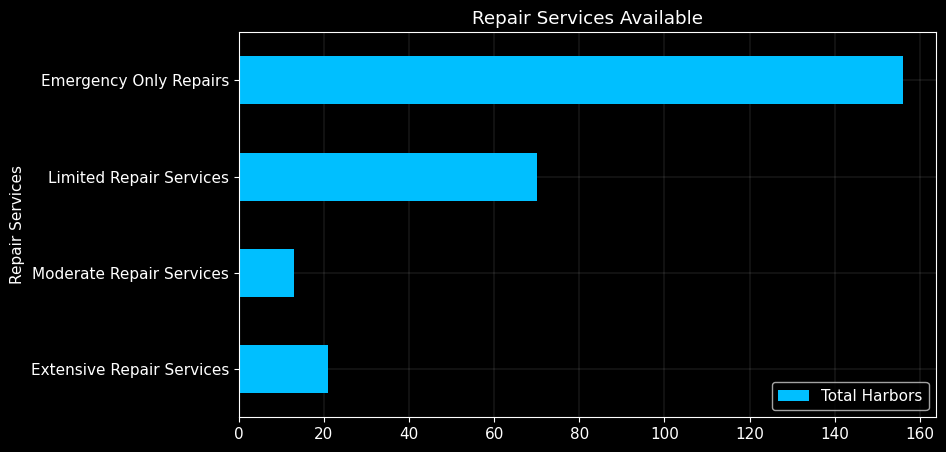

In [37]:
repair_facilities.plot(x= "Repair Services", y= "Total Harbors", 
                        title= "Repair Services Available" ,kind= "barh",
                        figsize= (9, 5), color = "deepskyblue");

Result set returned by the dataframes and number of rows
1. general_supplies,            528
2. lifting_power,               381
3. health_measures,             229
4. critical_infrastructure,     68
5. absence_of_restrictions,     47
6. extensive_repair_services    20
7. waste_disposal               16
8. terminal_presence            2
9. equipment_available          1
10. necessary_services          1
11. vessel_support              1

In [38]:
# results set >= 80
above_80_results = list(set(health_measures["Main Port Name"]) & set(lifting_power["Main Port Name"]) & set(general_supplies["Main Port Name"]))
above_80_results
len(above_80_results)

31

In [39]:
# 40 <= results set < 80
above_40_results = list(set(absence_of_restrictions["Main Port Name"]) & set(critical_infrastructure["Main Port Name"]))
above_40_results

['Newport News']

In [40]:
# 10 <= results set < 40
above_10_results = list(set(waste_disposal["Main Port Name"]) & set(extensive_repair_services["Main Port Name"]))
above_10_results

['New York City', 'Portsmouth', "Arkhangels'k"]

In [41]:
# 1 <= results set < 10
above_1_results = list(set(vessel_support["Main Port Name"]) & set(terminal_presence["Main Port Name"]) & set(equipment_available["Main Port Name"])
        & set(necessary_services["Main Port Name"]) )
above_1_results

[]

In [42]:
common_occurence = set(above_80_results) & set(above_10_results)
common_occurence

set()